In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
mice = ["mpfc14", "mpfc19", "mpfc20", "mpfc23", "mpfc24", "mpfc30"]
days = ["yd1", "yd2", "yd6"]

In [4]:
beh = []
for mi, mouse in enumerate(mice):
    behs = []
    for di, day in enumerate(days):
        behs.append(pd.read_csv("behavior/" + mouse + "/" + mouse + "_" + day + ".csv", header=None).values)
    beh.append(behs)

In [5]:
with open("h_spike_Wlim001.pkl", "rb") as f:
    h = pickle.load(f)

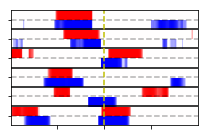

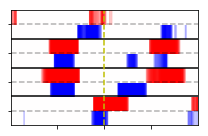

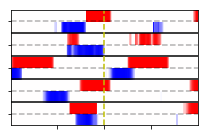

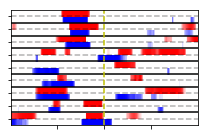

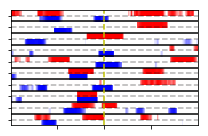

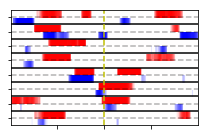

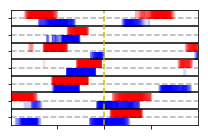

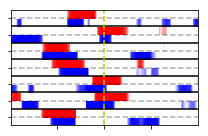

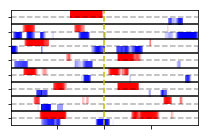

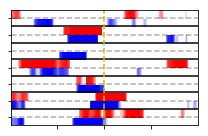

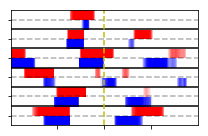

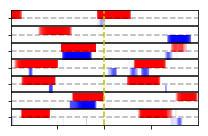

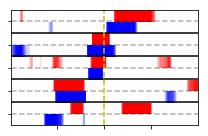

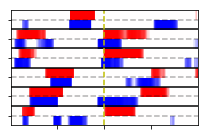

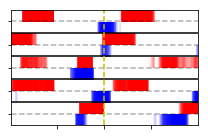

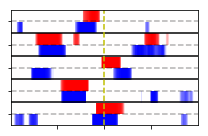

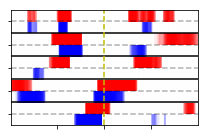

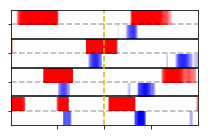

In [6]:
aves = []
for mi, mouse in enumerate(mice):
    aves_s = []
    for di, day in enumerate(days):
        flg = False
        miss = []
        succ = []
        count = 0
        for i, (lick, rew) in enumerate(zip(beh[mi][di][:, 1], beh[mi][di][:, 2])):
            if rew == 1:
                count = 0
                flg = True
                succ.append(i)
            elif lick == 1:
                if not flg:
                    count = 0
                    flg = True
                    miss.append(i)
                else:
                    count = 0
            elif flg:
                count += 1
                if count >= 50:
                    count = 0
                    flg = False
        
        t_h, k = h[mi][di].shape
        stmp = np.zeros((199, k))
        scnt = np.zeros(199)
        for s in succ:
            stmp[max(0, 50-s):min(199, t_h-s+50)] += h[mi][di][max(0, s-50):min(t_h, s+149)]
            scnt[max(0, 50-s):min(199, t_h-s+50)] += 1
        save = stmp / scnt[:, np.newaxis]
        mtmp = np.zeros((199, k))
        mcnt = np.zeros(199)
        for m in miss:
            mtmp[max(0, 50-m):min(199, t_h-m+50)] += h[mi][di][max(0, m-50):min(t_h, m+149)]
            mcnt[max(0, 50-m):min(199, t_h-m+50)] += 1
        mave = mtmp / mcnt[:, np.newaxis]
        
        act = np.zeros((199, k*2))
        ave = np.zeros((199, k*2))
        mu = np.dot(scnt[:, np.newaxis], h[mi][di].mean(axis=0)[np.newaxis, :])
        std = np.sqrt(np.dot(scnt[:, np.newaxis], h[mi][di].var(axis=0)[np.newaxis, :]))
        tmp = norm.cdf(stmp, loc=mu, scale=std) - 0.9
        tmp[tmp < 0] = 0
        tmp *= 10
        for i in range(k):
            act[:, i*2] = tmp[:, i]
            ave[:, i*2] = save[:, i]
        
        mu = np.dot(mcnt[:, np.newaxis], h[mi][di].mean(axis=0)[np.newaxis, :])
        std = np.sqrt(np.dot(mcnt[:, np.newaxis], h[mi][di].var(axis=0)[np.newaxis, :]))
        tmp = norm.cdf(mtmp, loc=mu, scale=std) - 0.9
        tmp[tmp < 0] = 0
        tmp *= -10
        for i in range(k):
            act[:, i*2+1] = tmp[:, i]
            ave[:, i*2+1] = mave[:, i]
            
        plt.figure(figsize=(3, 2))
        mp = plt.pcolor(act.T[::-1], cmap="bwr", vmin=-1, vmax=1)
        plt.xticks([49, 99, 149])
        plt.yticks([2 * i + 1 for i in range(k)])
        plt.hlines([2 * (i + 1) for i in range(k-1)], xmin=0, xmax=199, color="k")
        plt.hlines([2 * i + 1 for i in range(k)], xmin=0, xmax=199, color="k", alpha=0.3, linestyle="--")
        plt.vlines(99, ymin=0, ymax=k*2, color="y", linestyle="--")
        plt.tick_params(labelleft=False, labelbottom=False)
        plt.tight_layout()
        plt.savefig("paper/fig3/fig3e_" + mouse + "_" + day + ".png")
        plt.show()
        aves_s.append(ave)
    aves.append(aves_s)

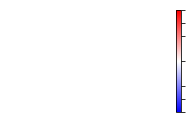

In [44]:
plt.figure(figsize=(3, 2))
mp = plt.pcolor([[]], cmap="bwr", vmin=-1, vmax=1)
cb = plt.colorbar(mp, ticks=[-1, -0.75, -0.5, 0, 0.5, 0.75, 1])
cb.ax.set_yticklabels(["" for _ in range(7)])
plt.axis("off")
plt.tight_layout()
plt.savefig("paper/fig3/fig3e_colorbar.png")

In [16]:
mi = 5
di = 2
flg = False
miss = []
succ = []
count = 0
for i, (lick, rew) in enumerate(zip(beh[mi][di][:, 1], beh[mi][di][:, 2])):
    if rew == 1:
        count = 0
        flg = True
        succ.append(i)
    elif lick == 1:
        if not flg:
            count = 0
            flg = True
            miss.append(i)
        else:
            count = 0
    elif flg:
        count += 1
        if count >= 50:
            count = 0
            flg = False
        
t_h, k = h[mi][di].shape
stmp = np.zeros((199, k))
scnt = np.zeros(199)
for s in succ:
    stmp[max(0, 50-s):min(199, t_h-s+50)] += h[mi][di][max(0, s-50):min(t_h, s+149)]
    scnt[max(0, 50-s):min(199, t_h-s+50)] += 1
save = stmp / scnt[:, np.newaxis]
mtmp = np.zeros((199, k))
mcnt = np.zeros(199)
for m in miss:
    mtmp[max(0, 50-m):min(199, t_h-m+50)] += h[mi][di][max(0, m-50):min(t_h, m+149)]
    mcnt[max(0, 50-m):min(199, t_h-m+50)] += 1
mave = mtmp / mcnt[:, np.newaxis]
        
act = np.zeros((199, k*2))
ave = np.zeros((199, k*2))
mu = np.dot(scnt[:, np.newaxis], h[mi][di].mean(axis=0)[np.newaxis, :])
std = np.sqrt(np.dot(scnt[:, np.newaxis], h[mi][di].var(axis=0)[np.newaxis, :]))
tmp = norm.cdf(stmp, loc=mu, scale=std) - 0.9
tmp[tmp < 0] = 0
tmp *= 10
for i in range(k):
    act[:, i*2] = tmp[:, i]
    ave[:, i*2] = save[:, i]
        
mu = np.dot(mcnt[:, np.newaxis], h[mi][di].mean(axis=0)[np.newaxis, :])
std = np.sqrt(np.dot(mcnt[:, np.newaxis], h[mi][di].var(axis=0)[np.newaxis, :]))
tmp = norm.cdf(mtmp, loc=mu, scale=std) - 0.9
tmp[tmp < 0] = 0
tmp *= -10
for i in range(k):
    act[:, i*2+1] = tmp[:, i]
    ave[:, i*2+1] = mave[:, i]

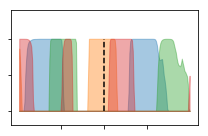

In [37]:
plt.figure(figsize=(3, 2))
plt.fill_between(np.arange(len(act[:, 0])), act[:, 0], color="C0", alpha=0.4)
plt.fill_between(np.arange(len(act[:, 0])), act[:, 2], color="C1", alpha=0.4)
plt.fill_between(np.arange(len(act[:, 0])), act[:, 4], color="C2", alpha=0.4)
plt.fill_between(np.arange(len(act[:, 0])), act[:, 6], color="C3", alpha=0.4)
plt.ylim(-0.2, 1.4)
plt.xticks([49, 99, 149])
plt.tick_params(labelleft=False, labelbottom=False)
plt.vlines(x=99, ymin=0, ymax=1, color="k", linestyles="--")
plt.tight_layout()
plt.savefig("paper/ext_fig7/ext_fig7c.png")

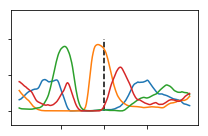

In [38]:
plt.figure(figsize=(3, 2))
plt.plot(ave[:, 0])
plt.plot(ave[:, 2])
plt.plot(ave[:, 4])
plt.plot(ave[:, 6])
plt.ylim(-0.2, 1.4)
plt.xticks([49, 99, 149])
plt.tick_params(labelleft=False, labelbottom=False)
plt.vlines(x=99, ymin=0, ymax=1, color="k", linestyles="--")
plt.tight_layout()
plt.savefig("paper/ext_fig7/extfig7b.png")

In [9]:
corrs = []
for mi, mouse in enumerate(mice):
    corrs_s = []
    for di in range(3):
        _, n2 = aves[mi][di].shape
        n = n2 // 2
        tmp = np.zeros((n, 3))
        for wi in range(n):
            tmp[wi, 0] = np.corrcoef(aves[mi][di][:99, wi*2], aves[mi][di][:99, wi*2+1])[0, 1]
            tmp[wi, 1] = np.corrcoef(aves[mi][di][100:, wi*2], aves[mi][di][100:, wi*2+1])[0, 1]
            tmp[wi, 2] = np.corrcoef(aves[mi][di][:, wi*2], aves[mi][di][:, wi*2+1])[0, 1]
        corrs_s.append(tmp)
    corrs.append(corrs_s)

In [10]:
dc = []
for di in range(3):
    dc_s = []
    for pi in range(3):
        tmp = []
        for mi, _ in enumerate(mice):
            tmp = np.hstack((tmp, corrs[mi][di][:, pi]))
        dc_s.append(tmp)
    dc.append(dc_s)

F_onewayResult(statistic=7.311406758672147, pvalue=0.0010402139930545304)


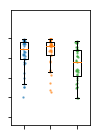

F_onewayResult(statistic=5.851476687781591, pvalue=0.003836824489736881)


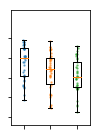

In [32]:
for i, p in enumerate(["before", "after"]):
    print(stats.f_oneway(dc[0][i], dc[1][i], dc[2][i]))
    plt.figure(figsize=(1.5, 2))
    for di, day in enumerate(["Day1", "Day2", "Day6"]):
        plt.scatter(np.ones_like(dc[di][i])+di+np.random.normal(size=len(dc[di][i]), loc=0, scale=0.02), dc[di][i], s=2, alpha=0.5, c="C"+str(di))
    plt.boxplot((dc[0][i], dc[1][i], dc[2][i]), sym="")
    plt.ylim(-1.2, 1.7)
    plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    plt.xticks([1, 2, 3], ["Day1", "Day2", "Day6"])
    plt.tick_params(labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig("paper/fig3/fig3f_" + p + ".png")
    plt.show()

In [17]:
df = pd.DataFrame({
    "error": np.hstack((dc[0][0], dc[1][0], dc[2][0])),
    "day": np.hstack((["Day1" for _ in dc[0][0]], ["Day2" for _ in dc[1][0]], ["Day6" for _ in dc[2][0]]))
})
tukey = pairwise_tukeyhsd(endog=df['error'],
                          groups=df['day'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Day1   Day2   0.0393 0.8928 -0.1728  0.2513  False
  Day1   Day6  -0.2781  0.007 -0.4916 -0.0647   True
  Day2   Day6  -0.3174 0.0019 -0.5322 -0.1026   True
----------------------------------------------------


In [18]:
df = pd.DataFrame({
    "error": np.hstack((dc[0][1], dc[1][1], dc[2][1])),
    "day": np.hstack((["Day1" for _ in dc[0][1]], ["Day2" for _ in dc[1][1]], ["Day6" for _ in dc[2][1]]))
})
tukey = pairwise_tukeyhsd(endog=df['error'],
                          groups=df['day'],
                          alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Day1   Day2   -0.233  0.059  -0.473  0.0069  False
  Day1   Day6  -0.3389 0.0033 -0.5805 -0.0973   True
  Day2   Day6  -0.1058 0.5537  -0.349  0.1373  False
----------------------------------------------------


Ttest_relResult(statistic=3.295228315641461, pvalue=0.0021360146114744625)
WilcoxonResult(statistic=203.0, pvalue=0.009065222504334279)


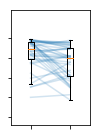

Ttest_relResult(statistic=7.02898971333506, pvalue=2.5935800660346248e-08)
WilcoxonResult(statistic=38.0, pvalue=1.421211976831575e-06)


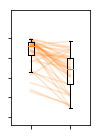

Ttest_relResult(statistic=3.50619797647104, pvalue=0.0012373734149430324)
WilcoxonResult(statistic=151.0, pvalue=0.0024879735312967445)


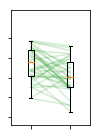

In [34]:
for di, day in enumerate(["Day1", "Day2", "Day6"]):
    plt.figure(figsize=(1.5, 2))
    one = np.ones_like(dc[di][0])
    plt.plot(np.vstack((one, one+1)), np.vstack((dc[di][0], dc[di][1])), c="C"+str(di), alpha=0.2)
    plt.boxplot((dc[di][0], dc[di][1]), sym="")
    plt.ylim(-1.2, 1.7)
    plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    plt.xticks([1, 2], ["before", "after"])
    print(stats.ttest_rel(dc[di][0], dc[di][1]))
    print(stats.wilcoxon(dc[di][0], dc[di][1]))
    plt.tick_params(labelleft=False, labelbottom=False)
    plt.tight_layout()
    plt.savefig("paper/ext_fig6/extfig6_" + day + ".png")
    plt.show()